# King County House Prices
**EDA for a fictional stakeholder**

![overview](figures/overview.png)

## Table of Contents

* [Introduction](#chapter0)
* [Getting started](#chapter1)
* [Understanding the data](#chapter2)
    * [Columns](#section_2_1)
    * [First look](#section_2_2)
    * [Observations](#section_2_3)
* [Hypothesis generation](#chapter3)
    * [General hypotheses](#section_3_1)
    * [Stakeholder-related hypotheses](#section_3_2)
* [Exploring the data](#chapter4)
    * [Distributions](#section_4_1)
    * [Observations](#section_4_2)
* [Cleaning the data](#chapter5)
    * [Git rid of unnecessary columns](#section_5_1)
    * [Checking for duplicates](#section_5_2)
    * [Adapting data types](#section_5_3)
    * [Adding colunns](#section_5_4)
* [Relationships in the data](#chapter6)
    * [Correlation matrix](#section_6_1)
    * [Deeper analysis](#section_6_2)
        * [General hypothesis 1](#section_6_2_1)
        * [General hypothesis 2](#section_6_2_2)
        * [General hypothesis 3](#section_6_2_3)
        * [Stakeholder-related hypothesis 1](#section_6_2_4)
        * [Stakeholder-related hypothesis 2](#section_6_2_5)
        * [Stakeholder-related hypothesis 3](#section_6_2_6)
* [Summary](#chapter7)
    * [General](#section_7_1)
    * [Stakeholder-related](#section_7_2) 
* [Summary](#chapter8)

## Introduction <a class="anchor" id="chapter0"></a>
To practice EDA, dataframe reshaping and plotting, I work myself through the following data:
* Topic: House sale prices
* Origin: kc_house.data.csv at www.kaggle.com
* Time span: May 2014 to May 2015
* Location: King County, including Seattle
* Size: 
    * 2.52 MB
    * 21597 house sales
    * 21 information per house sale

To have an objective I do this work as a fictional person who works in a fictional company for a fictional stakeholder (see [presentation](2022-01-27_presentation.pdf)).


## Getting started <a class="anchor" id="chapter1"></a> 
I start by importing helpful libraries and presetting the matplotlip-charts and panda-dataframes.

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio 
pio.renderers.default = "notebook"

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Then I load my data into a data frame with the surprising name 'df'.

In [2]:
df = pd.read_csv('data/King_County_House_prices_dataset.csv', delimiter=',')

## Understanding the Data <a class="anchor" id="chapter2"></a>
### Columns <a class="anchor" id="section_2_1"></a>

From my stakeholder I know that the columns hold the following data:
| Category | Column name | Unity | Description |
| --- | --- | --- | ----------- |
| agency-related | id | - | unique identified for a house |
|                | view | - | how often has the house been viewed |
| price | price | USD | is prediction target |
| time | date | - |date the house was sold 
|      | yr_built | - | year when house was built 
|      | yr_renovated | - | year when house was renovated 
| footage | sqft_living | squarefeet | square footage of the home |
|         | sqft_lot | squarefeet | square footage of the lot |
|         | sqft_above | squarefeet | square ootage of house apart from basement |
|         | sqft_basement | squarefeet | square footage of the basement |
|         | sqft_living15 | squarefeet | square footage of interior housing living space for the nearest 15 neighbors |
|         |sqft_lot15 | squarefeet | square footage of the land lots of the nearest 15 neighbors |
| comfort | bedrooms | - | # of bedrooms |
|          | bathrooms | - | # of bathrooms |
|          | floors | - | # of floors (levels) in house |
|          | waterfront | bolean | house which has a view to a waterfront |
| evaluation | condition | - | how good the condition is ( Overall ) (1-5) |
|            | grade | - | overall grade given to the housing unit, based on King County grading system (3-13) |
| location | zipcode | - | zip |
|          | lat | - | latitude coordinate |
|          | long | - | longitude coordinate |




### First look <a class="anchor" id="section_2_2"></a>
Now let's have a look at the data:

In [3]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [4]:
# size, data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# unexpected values? an example
df['sqft_basement'].value_counts()
#df['floors'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

### Observations <a class="anchor" id="section_2_3"></a>
21597 rows and 21 cloumns

Missing data, e.g. non-null < 21597, for (becomes more obvious with `df.isnull().sum()`):
* waterfront (index 8)
* view (index 9)
* yr_renovate (index 15)

Cells with no information: even if the cells are filled not all of them have a meaningful content:
* sqft_basement (index 13) holds 454 times '?'

Not all data types fit perfectly to the data:
* date (index 1) should be a date
* price (index 2) can gladly become an int as decimal places hold meaningful information
* sqft_basement (index 13) is an object by contrast to the other square footages (index 5, 6, 12, 19, 20) that are int64
* yr_renovated (index 15) is a float64, whereupon int64 is a better choice for a year
* waterfront (index 8) should be bolean instead of float64
* view (index 9) should be int64 instead of float 64 as a house couldn't be viewed half a time

Some data types fit better than I would have expected:
* bathrooms (index 4) is good to be float64 as bathrooms are not necessarily full rooms (e.g. only toilet)
* floors (index 7) is good to be float64 as floors can be at half hight

## Hypothesis Generation <a class="anchor" id="chapter3"></a>
### General Hypotheses <a class="anchor" id="section_3_1"></a> 
1. Will the house price increase with increasing square footage of the home and the lot? The differentiation between square foot of the basement and levels above don't seems important to me.
2. Will the house price decrease with increasing distance to the center of Seattle (lat=47.606111, long=-122.331944)? 
3. Are prices higher for newer and renovated houses? 
### Stakeholder-related Hypotheses  <a class="anchor" id="section_3_2"></a>
for Thomas Hansen, Buyer, 5 kids, no money, wants nice (social) neighborhood, Timing?, Location?
1. Are for a small price only 2 bathrooms and 3 bedrooms available?
2. Which cheap houses have a neighborhood with large houses so that presumably many children live there?
3. Are house prices smaller at a specific month?

## Exploring the data <a class="anchor" id="chapter4"></a>

### Distributions <a class="anchor" id="section_4_1"></a>
At first I will check for distributions within the numeric columns.

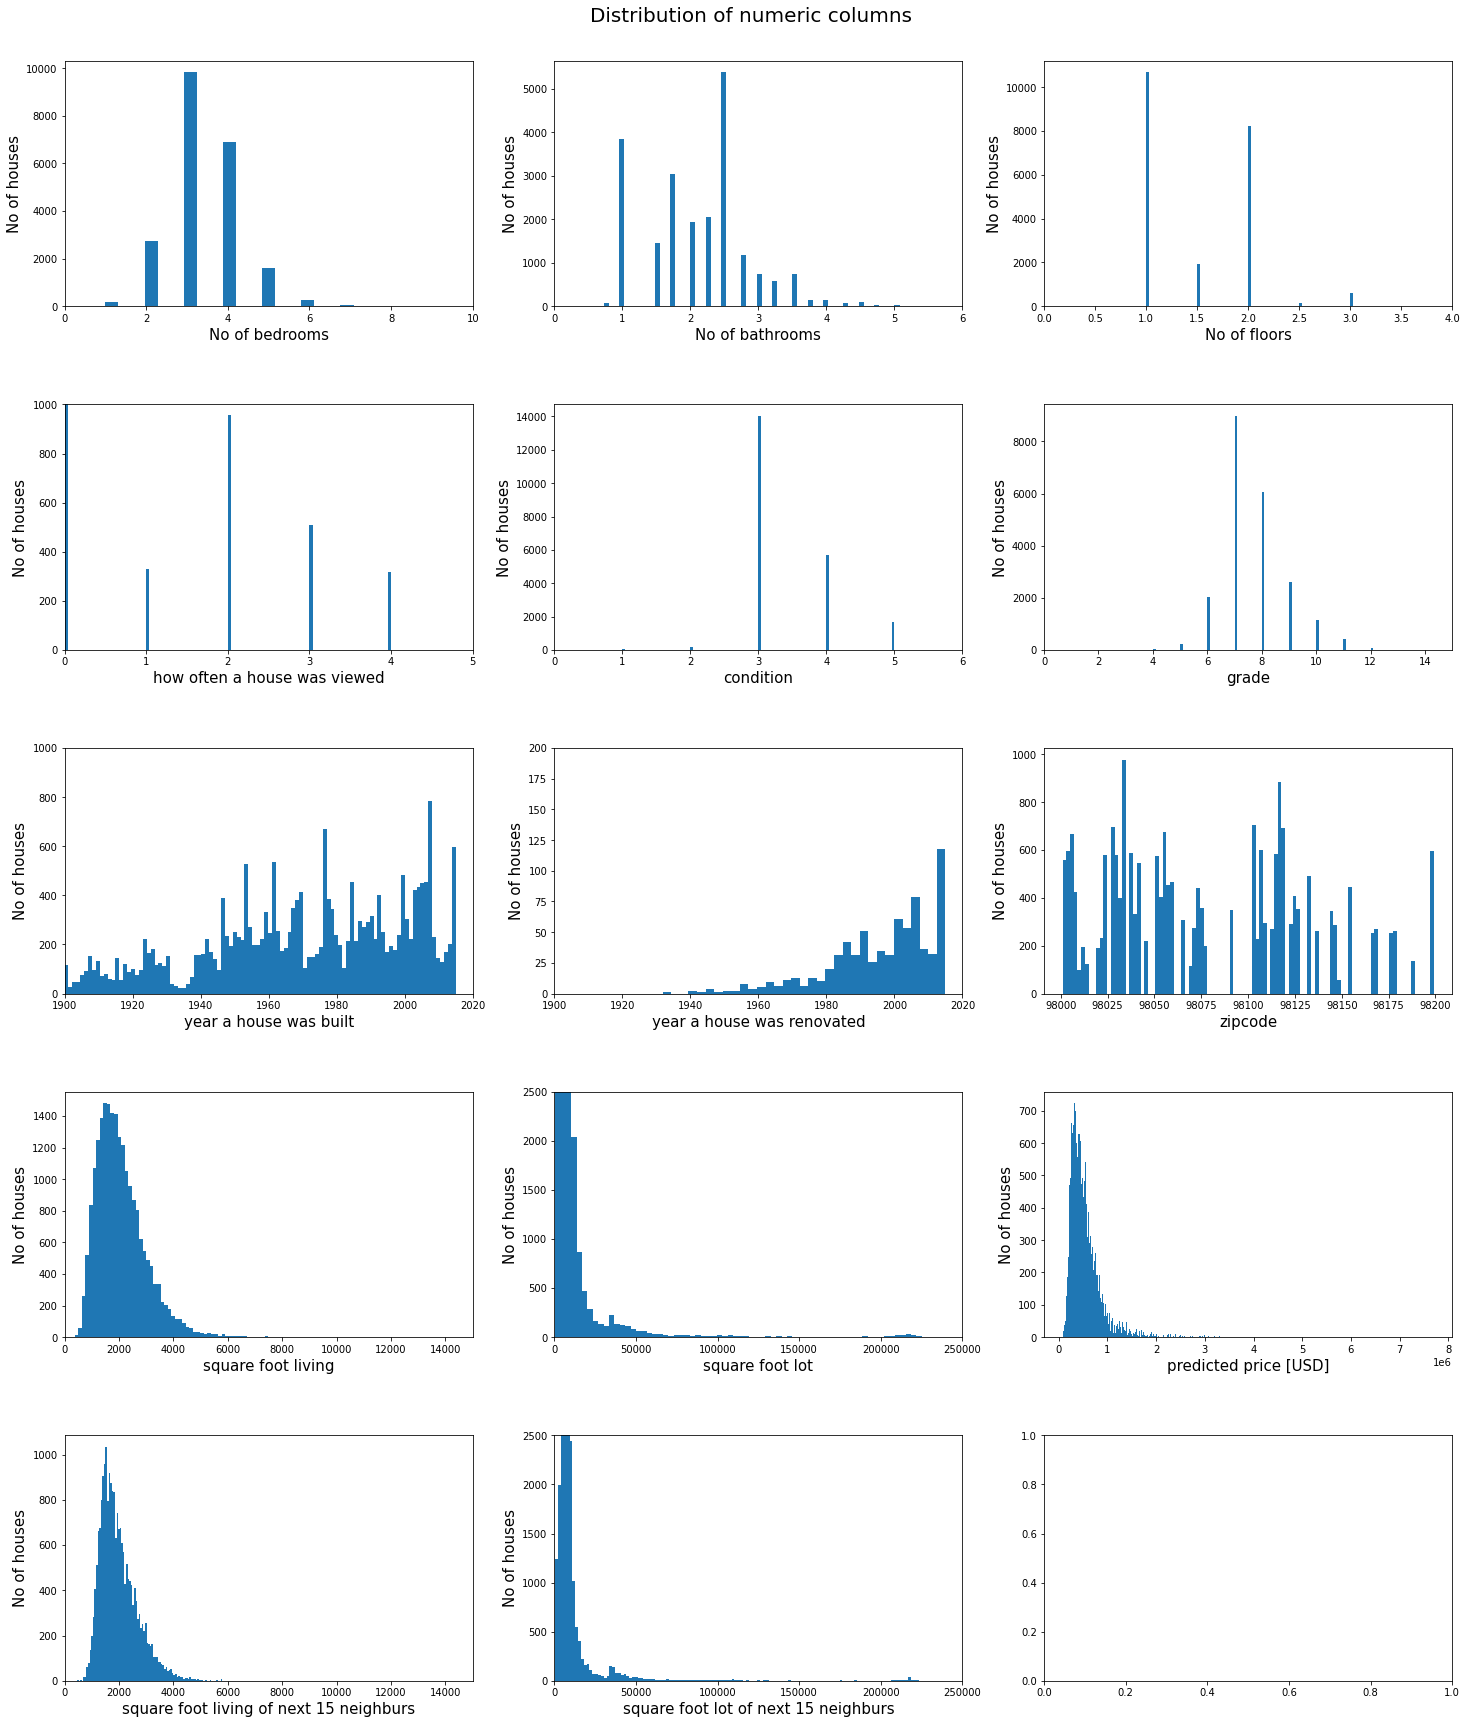

In [6]:
# create histograms for important values
fig, ax = plt.subplots(5,3, figsize=(20,25)) # create subplots on 4 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .4, wspace = .2, top = 0.95, bottom=0.05) # adjusts the space between the single subplots

ax[0][0].hist(x= df['bedrooms'], bins=100)            # creates histogram
ax[0][0].set_xlabel("No of bedrooms", fontsize = 15)  # sets the label x-axis
ax[0][0].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
ax[0][0].set_xlim(0,10)                               # limits x-axis
#ax[0][0]].set_title("Distribution of bedrooms", fontsize = 15);

ax[0][1].hist(x= df['bathrooms'], bins=100)            # creates histogram
ax[0][1].set_xlabel("No of bathrooms", fontsize = 15)  # sets the label x-axis
ax[0][1].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
ax[0][1].set_xlim(0,6)                               # limits x-axis

ax[0][2].hist(x= df['floors'], bins=100)            # creates histogram
ax[0][2].set_xlabel("No of floors", fontsize = 15)  # sets the label x-axis
ax[0][2].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
ax[0][2].set_xlim(0,4)                               # limits x-axis

ax[1][0].hist(x= df['view'], bins=100)            # creates histogram
ax[1][0].set_xlabel("how often a house was viewed", fontsize = 15)  # sets the label x-axis
ax[1][0].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
ax[1][0].set_xlim(0,5)                               # limits x-axis
ax[1][0].set_ylim(0,1000)                            # limits y-axis

ax[1][1].hist(x= df['condition'], bins=100)            # creates histogram
ax[1][1].set_xlabel("condition", fontsize = 15)  # sets the label x-axis
ax[1][1].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
ax[1][1].set_xlim(0,6)                               # limits x-axis

ax[1][2].hist(x= df['grade'], bins=100)            # creates histogram
ax[1][2].set_xlabel("grade", fontsize = 15)  # sets the label x-axis
ax[1][2].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
ax[1][2].set_xlim(0,15)                               # limits x-axis

ax[2][0].hist(x= df['yr_built'], bins=100)            # creates histogram
ax[2][0].set_xlabel("year a house was built", fontsize = 15)  # sets the label x-axis
ax[2][0].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
ax[2][0].set_xlim(1900,2020)                               # limits x-axis
ax[2][0].set_ylim(0,1000)                               # limits y-axis

ax[2][1].hist(x= df['yr_renovated'], bins=800)            # creates histogram
ax[2][1].set_xlabel("year a house was renovated", fontsize = 15)  # sets the label x-axis
ax[2][1].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
ax[2][1].set_xlim(1900,2020)                               # limits x-axis
ax[2][1].set_ylim(0,200)                               # limits y-axis

ax[2][2].hist(x= df['zipcode'], bins=100)            # creates histogram
ax[2][2].set_xlabel("zipcode", fontsize = 15)  # sets the label x-axis
ax[2][2].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis

ax[3][0].hist(x= df['sqft_living'], bins=100)            # creates histogram
ax[3][0].set_xlabel("square foot living", fontsize = 15)  # sets the label x-axis
ax[3][0].set_xlim(0,15000)                               # limits x-axis
ax[3][0].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis

ax[3][1].hist(x= df['sqft_lot'], bins=500)            # creates histogram
ax[3][1].set_xlabel("square foot lot", fontsize = 15)  # sets the label x-axis
ax[3][1].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
ax[3][1].set_xlim(0,0.25e6)                               # limits x-axis
ax[3][1].set_ylim(0,2500)                               # limits y-axis

ax[3][2].hist(x= df['price'], bins=500)            # creates histogram
ax[3][2].set_xlabel("predicted price [USD]", fontsize = 15)  # sets the label x-axis
ax[3][2].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis

ax[4][0].hist(x= df['sqft_living15'], bins=100)            # creates histogram
ax[4][0].set_xlabel("square foot living of next 15 neighburs", fontsize = 15)  # sets the label x-axis
ax[4][0].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
ax[4][0].set_xlim(0,15000)                               # limits x-axis

ax[4][1].hist(x= df['sqft_lot15'], bins=500)            # creates histogram
ax[4][1].set_xlabel("square foot lot of next 15 neighburs", fontsize = 15)  # sets the label x-axis
ax[4][1].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
ax[4][1].set_xlim(0,0.25e6)                               # limits x-axis
ax[4][1].set_ylim(0,2500)                               # limits y-axis

#ax[4][2].hist(x= df['sqft_lot15'], bins=500)            # creates histogram
#ax[4][2].set_xlabel("square foot lot of next 15 neighburs", fontsize = 15)  # sets the label x-axis
#ax[4][2].set_ylabel("No of houses", fontsize = 15)    # sets the label y-axis
#ax[4][2].set_xlim(0,0.25e6)                               # limits x-axis
#ax[4][2].set_ylim(0,2500)                               # limits y-axis

plt.savefig('figures/distribution.png')

### Observations <a class="anchor" id="section_4_2"></a>
* there are a lot new houses on the marked: 19422 that have view=0
* grade and condition have a comparable distribution as is reasonable
* there are only a few really big lots larger than 50.000 sqft
* number of renovated houses increase with time as can be expected
* sqft_living, sqft_lot, sqft_living15, sqft_lot15 and price show an comparable distribution as was expected

> no unexpected data


## Cleaning the data <a class="anchor" id="chapter5"></a>

### Get rid of unnecessary columns <a class="anchor" id="section_5_1"></a>
To make the data easier to handle I will drop the data not needed for the analysis of my hypothesis. That are the following columns:
* floors
* view
* condition
* grade
* waterfront
* sqft_above
* sqft_basement
* zipcode

In [7]:
# drop some columns
df.drop(["floors","view", "condition", "grade", "waterfront", "sqft_above", "sqft_basement", "zipcode"], axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1955,0.000,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,1951,1991.000,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1933,NaN,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1965,0.000,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1987,0.000,47.617,-122.045,1800,7503


### Checking for duplicates <a class="anchor" id="section_5_2"></a>

In [8]:
# check for duplicate rows in id column
df["id"].duplicated().value_counts()


False    21420
True       177
Name: id, dtype: int64

There are 177 identical ids in the data. They occur when houses are sold several times like this:

In [9]:
# example for an house that was sold two times
df[df['id'] == 1000102]
#df[df['id'].duplicated() == True].sort_values('id') # show the duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
2494,1000102,9/16/2014,280000.000,6,3.000,2400,9373,1991,0.000,47.326,-122.214,2060,7316
2495,1000102,4/22/2015,300000.000,6,3.000,2400,9373,1991,0.000,47.326,-122.214,2060,7316


As I am interested in the actual available houses, I'll drop the older rows:

In [10]:
# drop older duplicates
df = df.drop_duplicates(subset='id', keep='last')
df[df['id'] == 1000102]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.000,6,3.000,2400,9373,1991,0.000,47.326,-122.214,2060,7316


### Adapting data types <a class="anchor" id="section_5_3"></a>
As mentioned above some data types have to be adapted.

The **date** is changed from object to date, resulting for example in a change from '10/13/2014' to 2014-10-13.

In [11]:
# adapt date
df['date'] = pd.to_datetime(df['date'])

The **price** is changed from float to int to get rid of unnecessary decimal places.

In [12]:
# price: change float to integer
df['price'] = df['price'].apply(lambda x: int(x))

Empty cells in **yr_renovated** are filled with 0 before changing float to int. Afterwards renovated houses hold for yr_renovated values > 0.

In [13]:
# yr_renovated: replace empty cells (NaN) with 0
df.yr_renovated.fillna(0, inplace=True) 
# change float to integer
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: int(x))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.000,1180,5650,1955,0,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.250,2570,7242,1951,1991,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.000,770,10000,1933,0,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.000,1960,5000,1965,0,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.000,1680,8080,1987,0,47.617,-122.045,1800,7503


### Adding columns <a class="anchor" id="section_5_4"></a>
The distance to the Seattle's center I calculate via Pythagora's Theorem:

distance = sqrt( (long(house)-long(center)\*\*2 + (lat(house)-lat(center))\*\*2) )

with lat(center) = 47.606111 and long(center) = -122.331944

In [14]:
# calculate distance
df['distance'] = np.sqrt((df['long']-(-122.331944))**2 + (df['lat']-(47.606111))**2)
#df.head()


## Relationships in the data <a class="anchor" id="chapter6"></a>
### Correlation matrix <a class="anchor" id="section_6_1"></a>

In [15]:
# correlation matrix between columns
corr_columns=["date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15", "yr_built", "yr_renovated", "distance"]
corr_mtrx=df[corr_columns].corr()
corr_mtrx

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,yr_built,yr_renovated,distance
price,1.000,0.310,0.525,0.701,0.089,0.584,0.082,0.051,0.118,-0.193
bedrooms,0.310,1.000,0.515,0.579,0.032,0.395,0.031,0.155,0.017,0.081
bathrooms,0.525,0.515,1.000,0.756,0.088,0.569,0.088,0.506,0.048,0.141
sqft_living,0.701,0.579,0.756,1.000,0.173,0.756,0.184,0.317,0.051,0.141
sqft_lot,0.089,0.032,0.088,0.173,1.000,0.144,0.718,0.052,0.005,0.266
sqft_living15,0.584,0.395,0.569,0.756,0.144,1.000,0.183,0.325,0.001,0.217
sqft_lot15,0.082,0.031,0.088,0.184,0.718,0.183,1.000,0.070,0.004,0.297
yr_built,0.051,0.155,0.506,0.317,0.052,0.325,0.070,1.000,-0.203,0.425
yr_renovated,0.118,0.017,0.048,0.051,0.005,0.001,0.004,-0.203,1.000,-0.077
distance,-0.193,0.081,0.141,0.141,0.266,0.217,0.297,0.425,-0.077,1.000


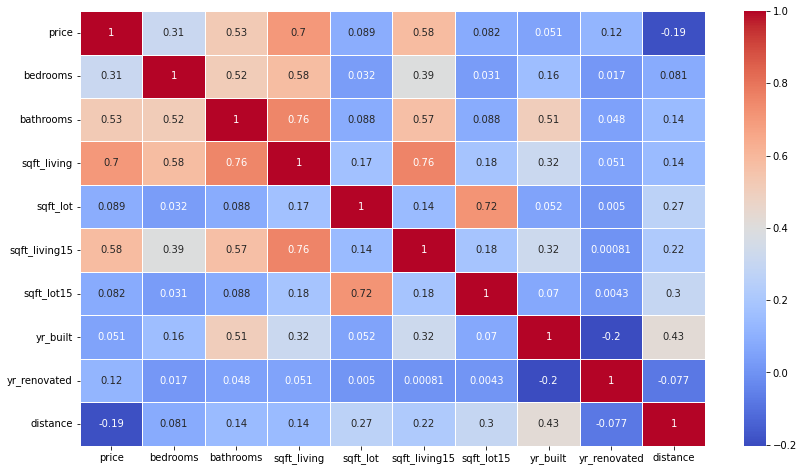

In [16]:
# draw the heatmap 
plt.figure(figsize = (14,8))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')
plt.savefig('figures/heatmap.png')

There are correlations, i.e. correlation number > 0.5, between:

| first value | second value | correlation <br> number | comment |
|---|---|---|---|
| price | bathrooms      | 0.53 |  |
|       | sqft_living    | 0.70 | suets my hypothesis |
|       | sqft_living15  | 0.58 | bad news as it will be harder to find a cheap house between large houses for my stakeholder |
| bedrooms | bathrooms   | 0.52 | |
|          | sqft_living | 0.58 | |
| bathrooms | sqft_living | 0.57 | |
|           | yr_built   | 0.51 | |
| sqft_living | sqft_living15 | 0.76 | neighbors seem to have comparable house sizes |
| sqft_lot | sqft_lot15 | 0.72 | neighbors seem to have comparable lot sizes |

Most of these correlations could have been expected. Meanwhile some correlations that I had predicted don't seem to hold:
| first value | second value | correlation <br> number | comment |
|---|---|---|---|
| price | sqft_lot | 0.09 | the lot size has no impact on house price (general hypothesis 1)|
|       | distance | -0.19 | the distance to Seatle's center is not important for the house price (general hypothesis g2)|
|       | yr_renovated | -0.08 | renovations have no obvious impact on house price (general hypothesis g3) <br> Presumable to many unrenovated houses are within the data set |
|       | yr_built     | 0.43 | the age of an house is not so far from being relevant for the price (general hypothesis g3) |

To make conclusions for the stakeholder-related hypotheses more data analysis is needed.



### Deeper analysis <a class="anchor" id="section_6_2"></a>
#### General hypothesis 1 <a class="anchor" id="section_6_2_1"></a>
Will the house price increase with increasing square footage of the house and the lot?

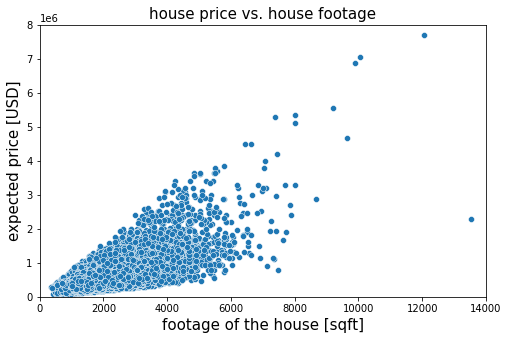

In [17]:
# scatterplot price vs. sqft_living
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.xlabel('footage of the house [sqft]', fontsize=15)
plt.ylabel('expected price [USD]', fontsize=15)
plt.title('house price vs. house footage', fontsize=15)
plt.ylim(0,8000000)
plt.xlim(0,14000)
plt.savefig('figures/price-sqft_living.png')

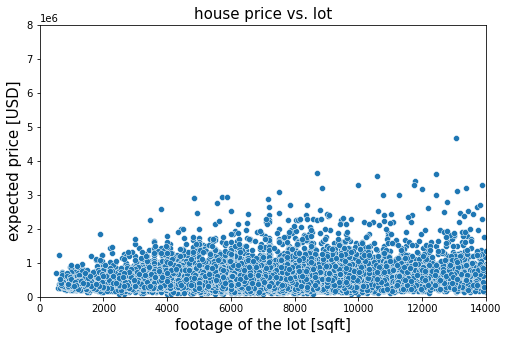

In [18]:
# scatterplot price vs. sqft_lot
sns.scatterplot(data=df, x='sqft_lot', y='price')
plt.xlabel('footage of the lot [sqft]', fontsize=15)
plt.ylabel('expected price [USD]', fontsize=15)
plt.title('house price vs. lot', fontsize=15)
plt.ylim(0,8000000)
plt.xlim(0,14000)
plt.savefig('figures/price-sqft_lot.png')


> * House price actually increases with footage of the house, but this is not the whole story. There seem to be are other impacts.
> * It's interesting that the maximum price per footage seems to result in a straight line.
> * As already figured out by the scatter matrix, there is no correlation between footage of the lot and house price. 
> * It seems that the house itself is more valuable than the ground it's built on.

#### General hypothesis 2 <a class="anchor" id="section_6_2_2"></a>
Will the house price decrease with increasing distance to the center of Seattle? <br>
We've seen by means of the correlation matrix that there is no correlation between house price and distance to the center of Seattle. Just to make sure, I will check whether the distance was calculated properly by illustrating the distance to the center on a map:

In [19]:
# house positions
fig = px.scatter_mapbox(df, lat="lat", lon="long", color="distance", center={'lat':47.47, 'lon':-122.0},
                        zoom=7.5, height=300, width=500, title="houses to be sold around Seattle")
# earth background
fig.update_layout(
    mapbox_style="open-street-map",
    )

fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0}) # enlarges white area around map
#fig.show()
fig.write_image('figures/distance.png')

![distance](figures/distance.png)

Looks good to me. So what else has the major geographical impact on house prices? To figure the out I'll show a map that only includes houses with are within a price range from median to 95th percentile

In [20]:
# create dataframe with prices below median
price_over_median = df[df.price > df.price.median()]
# create dataframe with prices between median and 95th percentile
price_50_to_95 = price_over_median[price_over_median.price < price_over_median.price.quantile(0.95)]


In [21]:
# create figure
# house positions
fig = px.scatter_mapbox(price_50_to_95, lat="lat", lon="long", color="price", center={'lat':47.6, 'lon':-122.2},
                        zoom=9.3, height=400, width=600, title="expensive houses to be sold around Seattle")
# earth background
fig.update_layout(
    mapbox_style="open-street-map",
    )

fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

#fig.show()
fig.write_image('figures/price.png')

![show figure price](figures/price.png)

> Living close to the water, especially on an ile, seems to be most expensive!

#### General hypothesis 3 <a class="anchor" id="section_6_2_3"></a>
Are prices higher for newer and renovated houses? 

For this I create a new dataframe that only holds renovated houses. Then I plot the price as a function of both year the house was built in and year the house was renovated.

In [22]:
# create dataframe with only renovated houses
renovated = df[df['yr_renovated'] > 0]
#renovated['yr_renovated'].min()

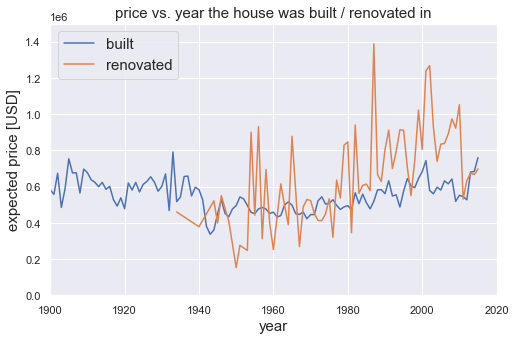

In [23]:
# create figure
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="yr_built", y="price", ci=None)  # ci removes the shading, estimator sets the calculation of average
sns.lineplot(data=renovated, x="yr_renovated", y="price", ci=None)
#sns.scatterplot(data=renovated, x="yr_renovated", y="price")
plt.xlabel('year', fontsize=15)
plt.ylabel('expected price [USD]', fontsize=15)
plt.title('price vs. year the house was built / renovated in', fontsize=15)
plt.xlim(1900,2020)
plt.ylim(0,1.5e6)
plt.legend(['built', 'renovated'], fontsize=15);
plt.savefig('figures/price-built-renovated.png')

The data has to be regarded in two areas:
> * Starting after Second World War in 1945 the house prices clearly increase with decreasing age and decreasing moment of renovation. So the answer to my general hypothesis 3 is "partly yes"!

> * Very old houses, e.g. built before 1945, achieve continuously high price.


#### Stakeholder-related hypothesis 1 <a class="anchor" id="section_6_2_4"></a>
Are for a small price only 2 bathrooms and 3 bedrooms available?

2 bathrooms and 3 bedrooms is a minimum for my stakeholder. Therefore I reduce the dataframe to these houses.

In [24]:
# generating dataframe adapted to stakeholder
stakeholder = df.query('bathrooms >=2 and bedrooms >=3')

To figure out what a small house price in King County is, I have a closer look at the overall price distribution.

In [25]:
# statistic information about prices
df.price.describe()
#df.price.quantile(0.1)

count     21420.000
mean     541861.428
std      367556.938
min       78000.000
25%      324950.000
50%      450550.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

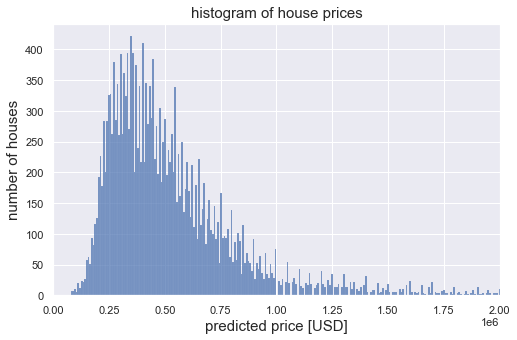

In [26]:
# histogram prices of houses
sns.histplot(data=df, x='price', bins=1000)
plt.xlabel('predicted price [USD]', fontsize=15)
plt.ylabel('number of houses', fontsize=15)
plt.title('histogram of house prices', fontsize=15)
plt.xlim(0,2e6)
plt.savefig('figures/price-histogram.png')

The overall price range is quite wide: (78.000 - 7.700.000) USD. As the price is a right skewed distribution, there are even for comparable small prices many houses available. I start with having a look at houses with prices below median, e.g. below 450.550 USD, to keep many opportunities for my stakeholder.

In [27]:
# create dataframe with cheap houses and at least 3 bedrooms and 2 bathrooms
stakeholder = stakeholder[stakeholder.price < df.price.median()]

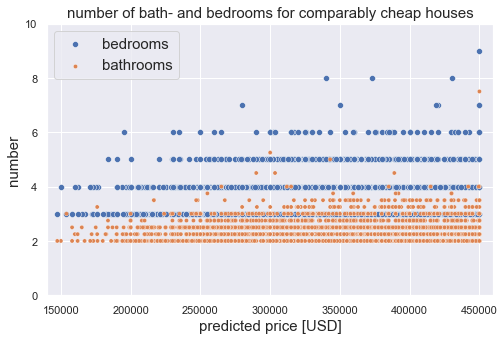

In [28]:
# scatterplot bathrooms, bedrooms vs price for relatively cheap houses with at least 3 bedrooms and 2 bathrooms
sns.scatterplot(data=stakeholder, x='price', y='bedrooms')
sns.scatterplot(data=stakeholder, x='price', y='bathrooms', size=1)

plt.xlabel('predicted price [USD]', fontsize=15)
plt.ylabel('number', fontsize=15)
plt.title('number of bath- and bedrooms for comparably cheap houses', fontsize=15)
plt.legend(['bedrooms', 'bathrooms'], fontsize=15)
plt.ylim(0,10)
plt.xlim(140000,460000)

plt.savefig('figures/cheap-2bath-3bed.png')



In [29]:
# how many houses left?
stakeholder.shape

(4650, 14)

> Good news for my stakeholder: even for comparably small prices 4650 houses with more than 3 bedrooms and 2 bathrooms are available.

#### Stakeholder-related hypothesis 2 <a class="anchor" id="section_6_2_5"></a>
Which cheap houses have a neighborhood with large houses so that presumably many children live there?

My stakeholder wants to live in a good social neighborhood. As he has 5 children this can be understood as a neighborhood with many children that have enough space for themselves. For this I will focus on a neighborhood with large houses, i.e. high values of sqft_living15.

In [30]:
df.sqft_living15.describe()

count   21420.000
mean     1988.384
std       685.537
min       399.000
25%      1490.000
50%      1840.000
75%      2370.000
max      6210.000
Name: sqft_living15, dtype: float64

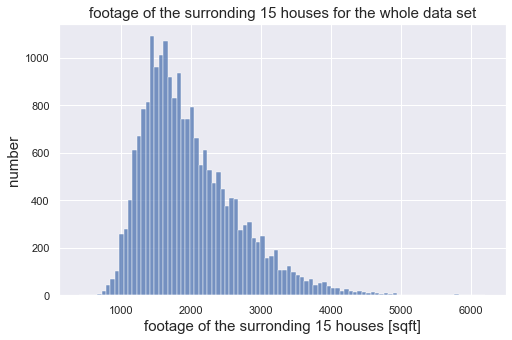

In [31]:
# histogram of sqft_living15
sns.histplot(data=df, x='sqft_living15')
plt.xlabel('footage of the surronding 15 houses [sqft]', fontsize=15)
plt.ylabel('number', fontsize=15)
plt.title('footage of the surronding 15 houses for the whole data set', fontsize=15)

plt.savefig('figures/hist-neighbors.png')


The distribution is again right skewed. This time I wanna make sure that the neighborhood really has a lot of space in their houses. For this I look look at the houses above median, e.g. with sqft_living15 > 1840 sqft, that have at least 2 bathrooms and 3 bedrooms.

In [32]:
# reduce dataframe to houses with sqft_living15 > median and at least 2 bathrooms and 3 bedrooms
stakeholder = stakeholder[stakeholder['sqft_living15'] > df['sqft_living15'].median()]

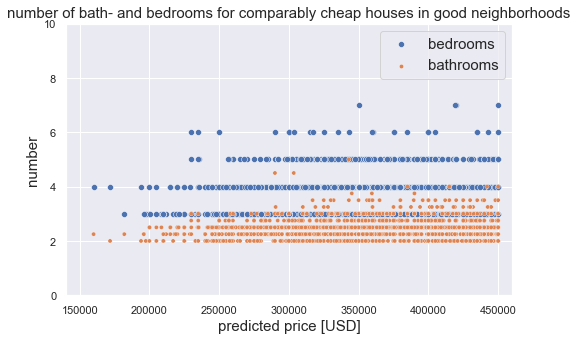

In [33]:
# scatterplot bathrooms, bedrooms vs price for relatively cheap houses with at least 3 bedrooms and 2 bathrooms
sns.scatterplot(data=stakeholder, x='price', y='bedrooms')
sns.scatterplot(data=stakeholder, x='price', y='bathrooms', size=1)

plt.xlabel('predicted price [USD]', fontsize=15)
plt.ylabel('number', fontsize=15)
plt.title('number of bath- and bedrooms for comparably cheap houses in good neighborhoods', fontsize=15)
plt.legend(['bedrooms', 'bathrooms'], fontsize=15)
plt.ylim(0,10)
plt.xlim(140000,460000)

plt.savefig('figures/cheap-2bath-3bed-neighbors.png')

In [34]:
# how many houses left?
stakeholder.shape

(2364, 14)

> Again good news for my stakeholder: 2321 of the comparably cheap houses with at least 3 bedrooms and 2 bathrooms presumably have a good neighborhood.

Now let's have to be a first glance at where these houses are situated. 

In [35]:
# house positions of the houses of interest
fig = px.scatter_mapbox(stakeholder, lat="lat", lon="long", color="price", center={'lat':47.47, 'lon':-122.0},
                        zoom=7.5, height=300, width=500, title="price and position of houses of interest")
# earth background
fig.update_layout(
    mapbox_style="open-street-map",
    )

fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0}) # enlarges white area around map
#fig.show()
fig.write_image('figures/position_stakeholder.png')

![houses of interest](figures/position_stakeholder.png)


Based on this now I can dive deeper into the houses together with my stakeholder.

#### Stakeholder-related hypothesis 3 <a class="anchor" id="section_6_2_6"></a>
Are house prices smaller at a specific month?

For this I have to extract the month form the date.


In [36]:
# add column with month to dataframes
stakeholder['month'] = stakeholder.date.apply(lambda x: x.month)

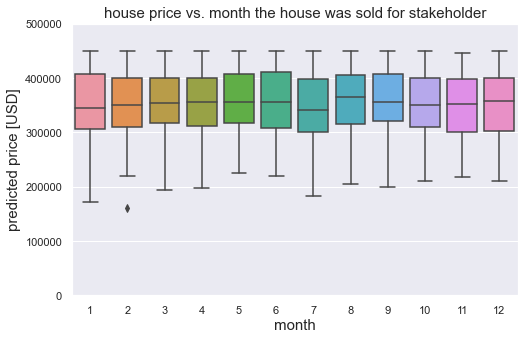

In [37]:
# boxplot price vs. month for comparably cheap houses with at least 2 bathrooms and 3 bedrooms in a good neighborhood
sns.boxplot(data=stakeholder, x='month', y='price')
plt.xlabel('month', fontsize=15)
plt.ylabel('predicted price [USD]', fontsize=15)
plt.title('house price vs. month the house was sold for stakeholder', fontsize=15)
plt.ylim(0,500000)
plt.savefig('figures/cheap-2bath-3bed-neighbors-month.png')

> The month a house is sold has only a small impact on the predicted price for the houses my stakeholder is interested in. I recommend to buy in January or July.

## Summary <a class="anchor" id='chapter7'></a>
### General <a class="anchor" id='section_7_1'></a>
Some of my hypotheses were disproved, therefore I made some other findings:
1. House prices increase with increasing square footage of the home, but not the lot. Consequently houses seem to be more valuable than land.
2. House prices do not decrease with increasing distance to the center of Seattle. It's living close to the water, especially at an isle, that is expensive.
3. Prices for newer and renovated houses are higher. But houses that where built before 1945 achieve continuously high prices.

### Stakeholder-related <a class="anchor" id='section_7_2'></a>
I've got good news for my stakeholder:
1. Even for comparable small prices below median, i.e. 450.050 USD, 4650 houses with at least 3 bedrooms and 2 bathroom are available
2. 2321 of these houses have a neighborhood with large houses so that presumably many children live there.
3. To buy one of these houses, it is recommended to wait until January or July.

Now it's time to further discuss with my stakeholder.


## Final remarks <a class="anchor" id='chapter8'></a>
This was only a brief excursion into the data. The data cleaning was by chance quite easy. But I'm aware that there are some false data like this house with 33 bedrooms and 1.75 bathrooms, that simply didn't matter for.